<a href="https://colab.research.google.com/github/sachinHansak/Churn-Prediction-with-ANN/blob/main/Churn_Prediction_ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling (1)/Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Divide dataset into independent and dependent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
## Feature engineering

geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [ ]:
## Concatenate this variable with dataframe

X.drop(['Geography', 'Gender'], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# Splitting dataset into training and testset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,667,34,5,0.00,2,1,0,163830.64
9275,427,42,1,75681.52,1,1,1,57098.00
2995,535,29,2,112367.34,1,1,0,185630.76
5316,654,40,5,105683.63,1,1,0,173617.09
356,850,57,8,126776.30,2,1,1,132298.49
...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79
4859,794,22,4,114440.24,1,1,1,107753.07
3264,738,35,5,161274.05,2,1,0,181429.87
9845,590,38,9,0.00,2,1,1,148750.16


In [ ]:
# Featue scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [ ]:
X_train.shape

(8000, 8)

In [ ]:
# part 02 Now lets create a ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## initiate the ANN

classifier = Sequential()

In [ ]:
## Adding the input layer

classifier.add(Dense(units=11, activation='relu'))

In [ ]:
## Adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))

In [ ]:
## Adding the second hidden layer

classifier.add(Dense(units=6, activation='relu'))

In [ ]:
## Adding the output layer

classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Early stopping

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5086 - accuracy: 0.7918 - val_loss: 0.4637 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4477 - accuracy: 0.7962 - val_loss: 0.4491 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4348 - accuracy: 0.7968 - val_loss: 0.4366 - val_accuracy: 0.8001
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4213 - accuracy: 0.8153 - val_loss: 0.4252 - val_accuracy: 0.8141
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4030 - accuracy: 0.8233 - val_loss: 0.4052 - val_accuracy: 0.8258
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3839 - accuracy: 0.8442 - val_loss: 0.3898 - val_accuracy: 0.8372
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3669 - accuracy: 0.8528 - val_loss: 0.3805 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

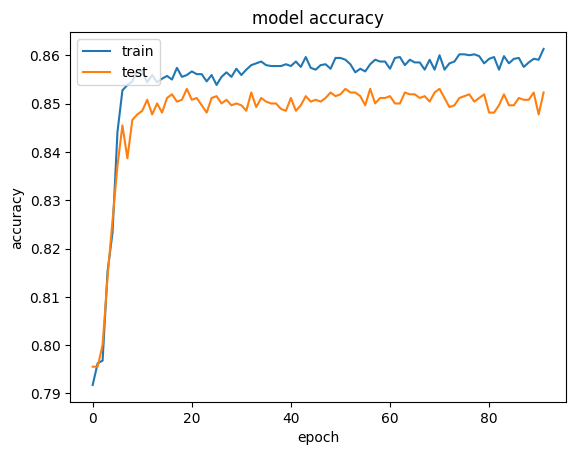

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

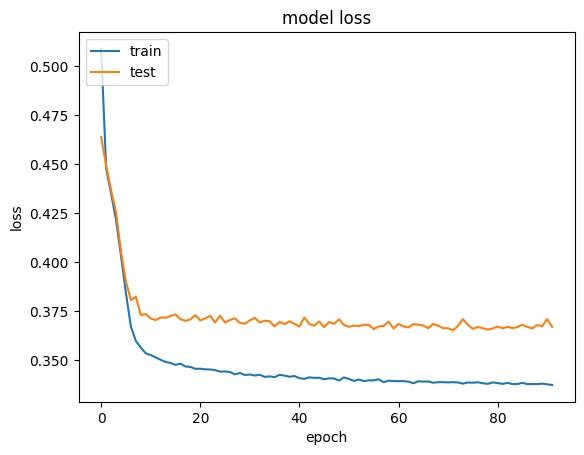

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   62],
       [ 215,  190]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8615

In [ ]:
## get the weights

classifier.get_weights()

[array([[-0.12230613, -0.1581223 ,  0.25740102, -0.00534507, -0.07576922,
         -0.13710605, -0.05851214,  0.00220892,  0.05855092, -0.1709502 ,
         -0.09219465],
        [ 0.21636699,  1.1173948 , -0.3681064 , -0.90193784,  0.9251446 ,
         -0.17260918,  0.5244664 ,  0.05613768, -0.69817954, -0.16781695,
          0.59830284],
        [ 0.09647305,  0.0295561 ,  0.05107336, -0.31071824,  0.08638535,
          0.29530823, -0.2772271 ,  0.14957258,  0.6052933 , -0.02483581,
         -0.26192385],
        [-0.50736254,  0.36776865, -0.6893281 , -0.01507648, -0.6118825 ,
          0.04411031, -0.32199025,  0.21875525, -0.00356272,  0.76620656,
         -0.10031269],
        [ 0.3863198 ,  0.32841504,  0.3666289 ,  0.02492065, -0.8669547 ,
          0.36060965, -0.7888747 ,  0.8973438 , -0.5398564 , -0.6145059 ,
          1.1406661 ],
        [-0.67492193,  0.05358193,  0.3543299 , -0.5309878 ,  0.17093745,
          0.68450624, -0.05952834,  0.25544414,  0.7258484 ,  0.4370320